In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv("Mental_Health_Care_in_the_Last_4_Weeks.csv")

In [35]:
df['Received_Care'] = df['Indicator'].apply(
    lambda x: 0 if "Did Not Get It" in x else 1
)

In [36]:
columns_to_drop = [
    'Indicator', 'Confidence Interval', 'Quartile Range', 'Suppression Flag',
    'Time Period Label', 'Time Period Start Date', 'Time Period End Date'
]
df_cleaned = df.drop(columns=columns_to_drop)

In [37]:
num_imputer = SimpleImputer(strategy='mean')
df_cleaned[['Value', 'LowCI', 'HighCI']] = num_imputer.fit_transform(
    df_cleaned[['Value', 'LowCI', 'HighCI']]
)

In [38]:
X = df_cleaned.drop(columns=['Received_Care'])
y = df_cleaned['Received_Care']


In [39]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()


In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])


In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
metrics_scores = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}


Model Evaluation: Logistic Regression
Accuracy: 0.7232099951946179
Precision: 0.7837684449489217
Recall: 0.876269035532995
F1 Score: 0.8274415817855003
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.25      0.30       505
           1       0.78      0.88      0.83      1576

    accuracy                           0.72      2081
   macro avg       0.59      0.56      0.56      2081
weighted avg       0.69      0.72      0.70      2081



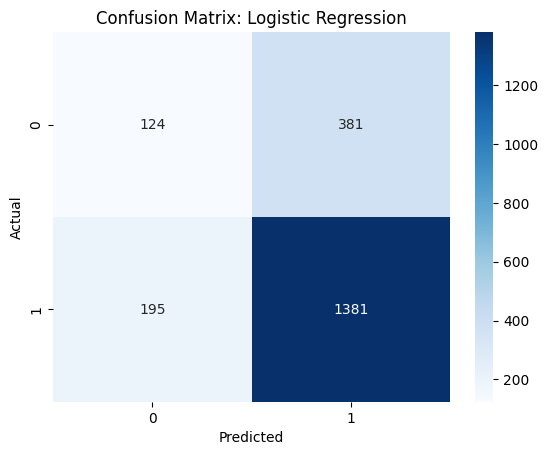


Model Evaluation: KNN
Accuracy: 0.7539644401729938
Precision: 0.8208685162846804
Recall: 0.8635786802030457
F1 Score: 0.8416821273964131
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.41      0.45       505
           1       0.82      0.86      0.84      1576

    accuracy                           0.75      2081
   macro avg       0.66      0.64      0.64      2081
weighted avg       0.74      0.75      0.75      2081



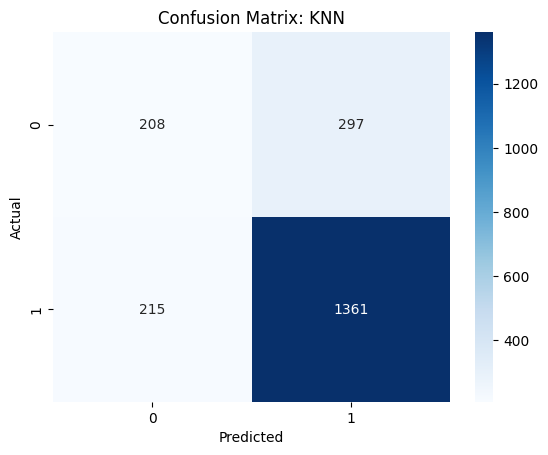


Model Evaluation: Decision Tree
Accuracy: 0.7976934166266219
Precision: 0.8607120549656465
Recall: 0.8743654822335025
F1 Score: 0.8674850487881649
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.57       505
           1       0.86      0.87      0.87      1576

    accuracy                           0.80      2081
   macro avg       0.72      0.72      0.72      2081
weighted avg       0.79      0.80      0.80      2081



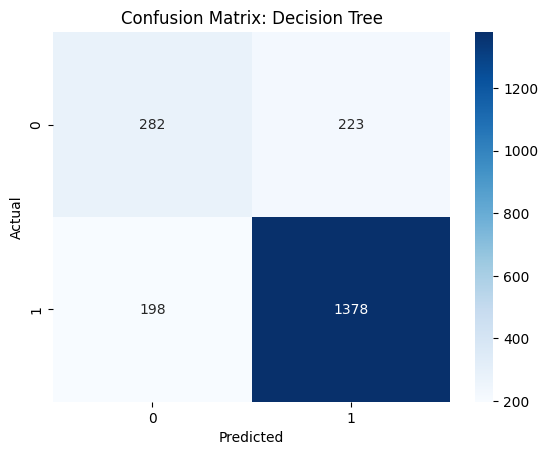


Model Evaluation: Random Forest
Accuracy: 0.8034598750600673
Precision: 0.8649155722326454
Recall: 0.8775380710659898
F1 Score: 0.8711811023622047
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59       505
           1       0.86      0.88      0.87      1576

    accuracy                           0.80      2081
   macro avg       0.73      0.72      0.73      2081
weighted avg       0.80      0.80      0.80      2081



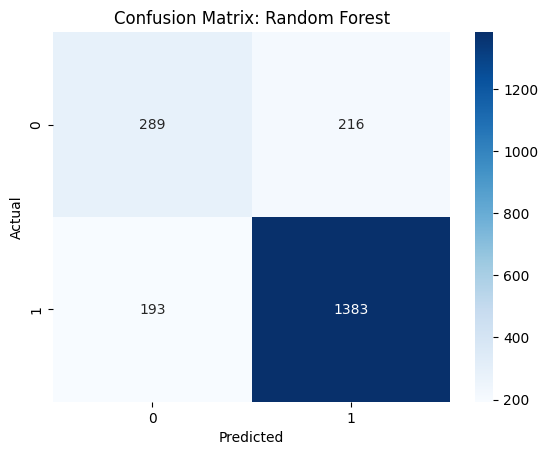


Model Evaluation: SVM
Accuracy: 0.7573282075925036
Precision: 0.7573282075925036
Recall: 1.0
F1 Score: 0.8619086683073558
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.76      1.00      0.86      1576

    accuracy                           0.76      2081
   macro avg       0.38      0.50      0.43      2081
weighted avg       0.57      0.76      0.65      2081



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

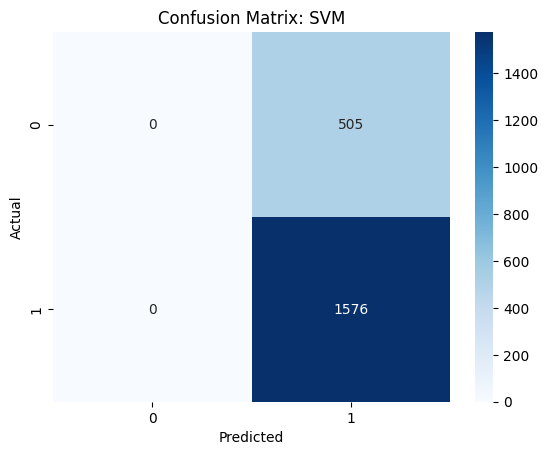


Model Evaluation: Gradient Boosting
Accuracy: 0.7924074963959635
Precision: 0.8388625592417062
Recall: 0.8984771573604061
F1 Score: 0.8676470588235294
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52       505
           1       0.84      0.90      0.87      1576

    accuracy                           0.79      2081
   macro avg       0.72      0.68      0.69      2081
weighted avg       0.78      0.79      0.78      2081



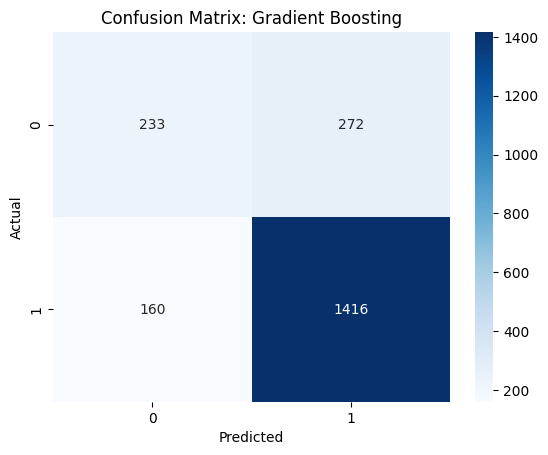

In [44]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_scores["Model"].append(name)
    metrics_scores["Accuracy"].append(acc)
    metrics_scores["Precision"].append(prec)
    metrics_scores["Recall"].append(rec)
    metrics_scores["F1 Score"].append(f1)

    print(f"\nModel Evaluation: {name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [45]:
metrics_df = pd.DataFrame(metrics_scores)


In [46]:
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.723210   0.783768  0.876269  0.827442
1                  KNN  0.753964   0.820869  0.863579  0.841682
2        Decision Tree  0.797693   0.860712  0.874365  0.867485
3        Random Forest  0.803460   0.864916  0.877538  0.871181
4                  SVM  0.757328   0.757328  1.000000  0.861909
5    Gradient Boosting  0.792407   0.838863  0.898477  0.867647


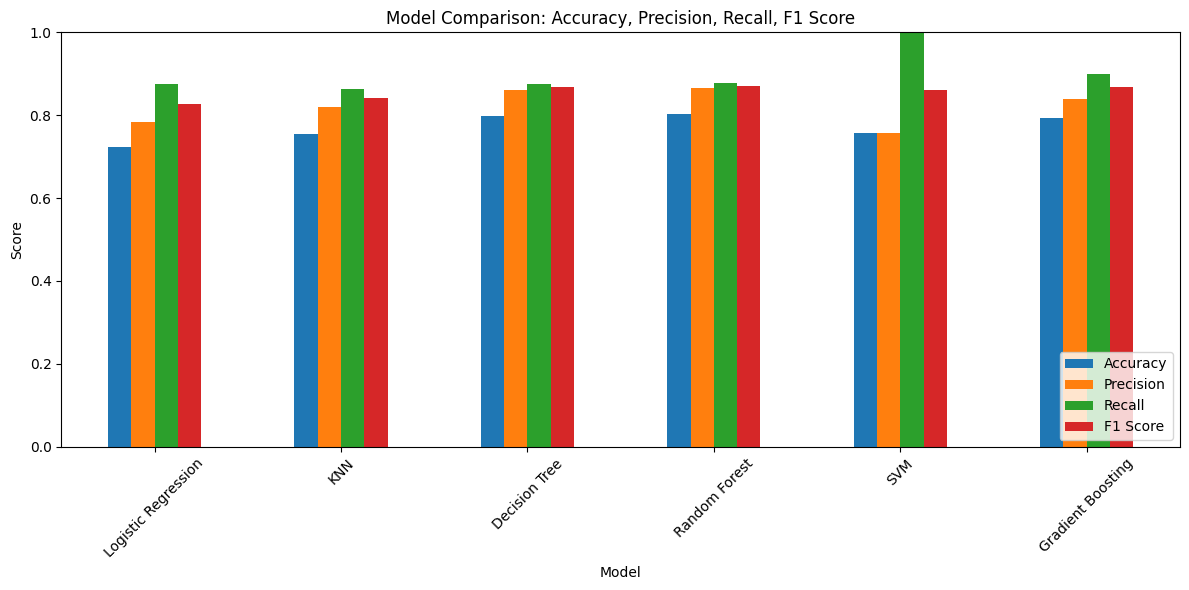

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
metrics_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', ax=ax)
plt.title("Model Comparison: Accuracy, Precision, Recall, F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

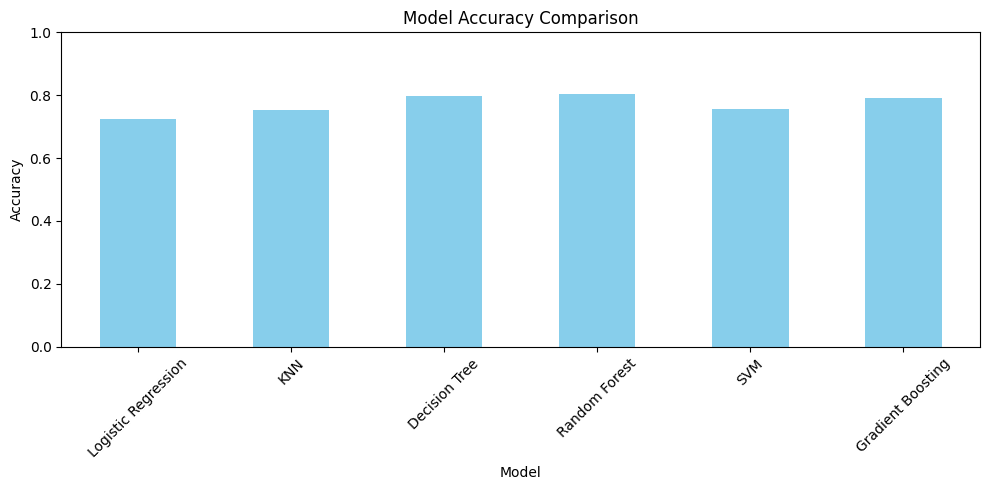

In [48]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
metrics_df.plot(x="Model", y="Accuracy", kind="bar", legend=False, ax=ax2, color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
best_model = metrics_df.loc[metrics_df['F1 Score'].idxmax()]
print(f"\nBest Performing Model: {best_model['Model']} with F1 Score = {best_model['F1 Score']:.4f}")




Best Performing Model: Random Forest with F1 Score = 0.8745
